In [1]:
import pandas as pd
import seaborn as sns
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.chart import BarChart, Reference
from openpyxl.drawing.image import Image

contestants = pd.read_excel('contestants_cleaned.xlsx')
contestants.head()

,email,cohort,pre,post,age,sex,education,satisfaction,study_hours
0,smehaffey0@creativecommons.org,4,485,494,32,Male,Bachelor's,2,36.6
1,bbenham2@xrea.com,3,477,483,33,Female,Bachelor's,1,19.8
2,jagostini4@wordpress.org,1,495,494,38,Female,Bachelor's,9,32.5
3,kbridgnell5@webnode.com,1,484,503,32,Female,Bachelor's,6,32.2
4,abotham6@usda.gov,1,497,501,30,Female,Bachelor's,10,32.3


# Option A: Write an Excel plot

Excel's data visualization features are popular because they are easy to use and effective. Let's explore how to create Excel charts using `openpyxl`.

## Creating the raw data source 

To plot data in Excel, we must first write the data to an Excel workbook. Let's begin by generating the necessary data source using the `value_counts()` function. We'll use this data to create a basic plot visualizing the number of observations in each cohort.

In [2]:
cohort_count = contestants['cohort'].value_counts().reset_index()
cohort_count

,index,cohort
0,1,23
1,3,21
2,4,20
3,2,18


The `reset_index()` function is used in the previous code block to reset the resulting DataFrame back to its original index. To make this DataFrame more readable, let's rename the columns to `cohort` and `count`, respectively: 

In [3]:
cohort_count = cohort_count.rename(columns={'index':'cohort', 'cohort':'count'})
cohort_count

,cohort,count
0,1,23
1,3,21
2,4,20
3,2,18


Now that we have it summarized exactly as we want it to be plotted, let's transfer the data to Excel.

## Exporting the data to Excel

The first step is to X.  CHECK OUT THIS POST FOR MORE.  https://stringfestanalytics.com/wp-admin/post.php?post=11287&action=edit

In [4]:
# Create a new Workbook
workbook = Workbook()

# Get the active worksheet
worksheet = workbook.active

# Name the worksheet as "data"
worksheet.title = "data"

# Write the DataFrame to the worksheet
for row in dataframe_to_rows(cohort_count, index=False, header=True):
    worksheet.append(row)

## Building the Excel plot from Python

Let's try this out

### Getting the dimensions of the data

Remember the Excel plot is actually built from the underlying cell references SO let's go ahead and set up the total number of rows.

Generally, Python uses [zero-based indexing](https://stringfestanalytics.com/seen-zero-based-indexing/) but Excel users 1 so there's a little bit of going between.

In [5]:
# Get dimensions of the data 

total_rows = len(cohort_count) + 1
category_col = cohort_count.columns.get_loc('cohort') + 1
value_col = cohort_count.columns.get_loc('count') + 1

### Creating the bar chart

Let's do it! We'll use several features of `openpyxl` along with setting up the proper dimensions of the thing. 

the label for the categories of a bar chart is typically not considered part of the active series  so that one will start at row 2 rather than row 1. 

In [6]:
chart = BarChart()
chart.title = "Number of participants by cohort"

categories = Reference(worksheet, min_col=category_col, min_row=2, max_row=total_rows)
values = Reference(worksheet, min_col=value_col, min_row=1, max_row=total_rows)

chart.add_data(values, titles_from_data=True)
chart.set_categories(categories)

### Saving and closing

The last step is to specify where in the workbook to save it. Last, we'll save our work as `countplot.xlsx`.

In [7]:
worksheet.add_chart(chart, "E1")
workbook.save("countplot.xlsx")

# Option 2: Create a Python visualization

Not every viz is available in Excel and it's much easier to customize Python plots. 

For example, maybe you want to check the relationships between a bunch of variables at once. This is pretty hard in Excel as there's no out of the box way to compare a bunch of variables. But we can use the pairplot in Excel to make this happen pretty quickly. 

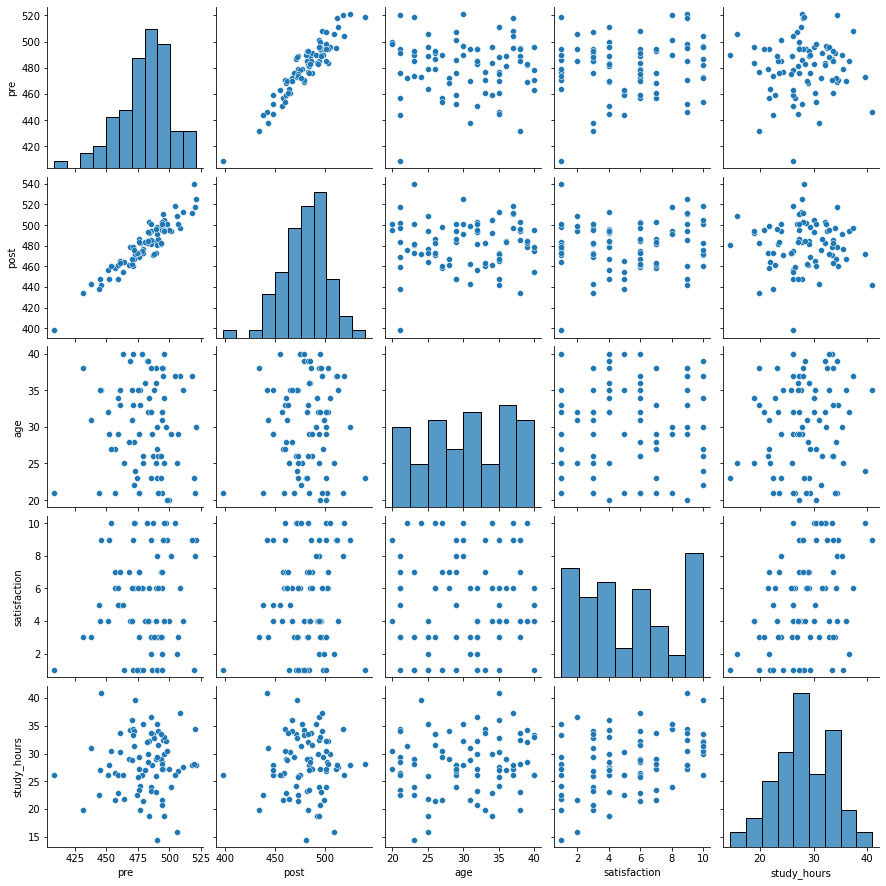

In [8]:
sns.pairplot(contestants[['pre', 'post', 'age', 'satisfaction', 'study_hours']])

One of the biggest advantages of Python is it's much more powerful AND it's easier to iterate and expand on the plot. For example we can X.

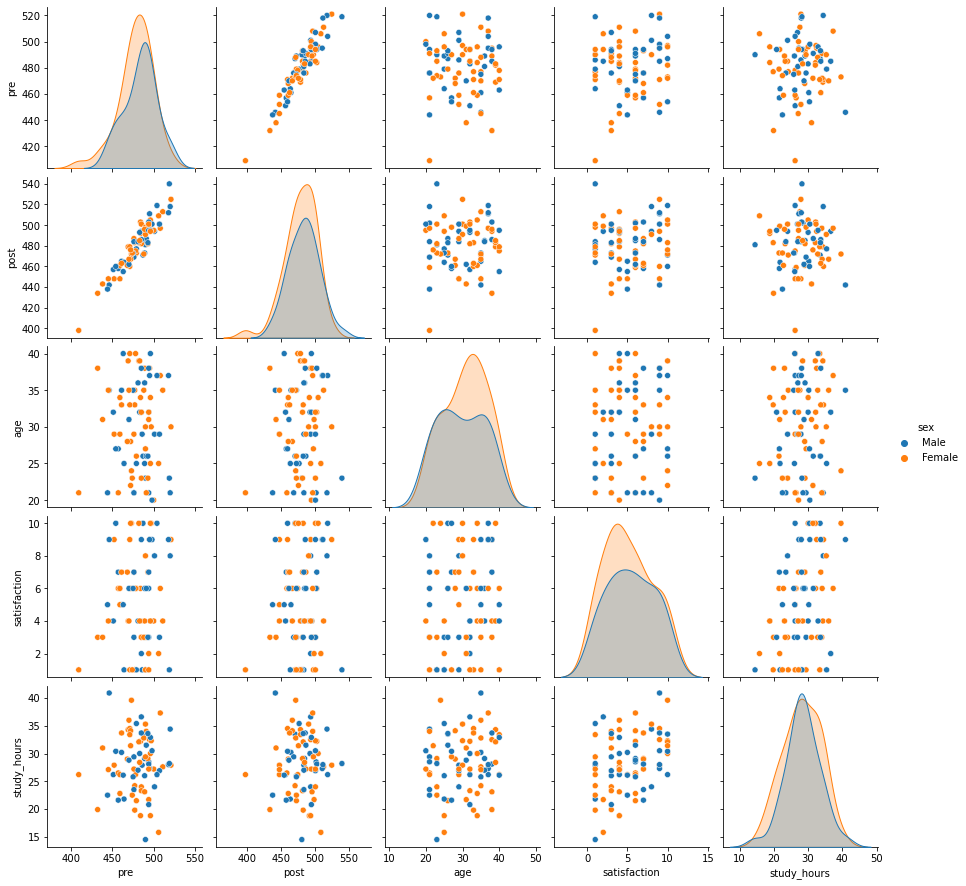

In [9]:
sns_plot = sns.pairplot(contestants[['pre', 'post', 'age', 'satisfaction', 'study_hours', 'sex']],
            hue='sex')

I need to save this plot as an image and I also want this to go on its own worksheet. Let's do it!

In [10]:
# Create new worksheet 
worksheet_2 = workbook.create_sheet('pairplot')

In [11]:
# Save lastcreated viz as an image
sns_plot.savefig("pairplot.png")

In [12]:
# Load saved image into the worksheet
image = Image("pairplot.png")
worksheet_2.add_image(image, "A1")

In [13]:
workbook.save('python-excel-charts.xlsx')
workbook.close()